# Central Limit Theorem and Confidence Intervals - Introduction

## Introduction
In this section, you'll be introduced to inferential statistics. You'll learn about sampling, the central limit theorem, and the T-distribution.

## Distributions and Sampling

In this section, we're returning to statistics to broaden and deepen our understanding of distributions and sampling.

### Sampling

We'll start by providing an introduction to the idea of **_Sampling_** - selecting a subset of a population to survey.  We'll then start to introduce some statistics related to sampling by explaining and showing how to calculate the standard error.

### The Central Limit Theorem

Once we understand a bit about sampling, we'll explore how we can use it by digging deep into one of the coolest and most important concepts in inferential statistics--the **_Central Limit Theorem_**! We'll start by learning about how the Central Limit Theorem works, and explore how we can use it in a way that allows us to treat non-normal distributions as normal distributions, and provides a way for us to estimate parameters about a population.

### The T-Distribution

Finally, we'll end this section by learning about how we can use the **_T-Distribution_** for dealing with samples that are smaller, and that have an unknown standard deviation. We'll explore how the T-Distribution works, learn about *degrees of freedom*, and then see how we can calculate confidence intervals using our newfound knowledge of the T-Distribution. 

# Sampling Theory

Better data; not more data!

**Sample:** A set of observations drawn from a population, it should represent the population well.

**Population:** Target group.

**Sampling distribution:** A probability distribution of a statistics obtained through a large number of samples drawn from a specific population.

**Central limit theorem:** A statistical theory which states that when a sufficiently large sample size is given from a population with a finite level of variance; the mean of all samples from the same population will be approximately equal to the mean of the population.

# Sample 
+ Crate a random population of 10000:

In [1]:
import numpy as np

In [2]:
np.random.seed(10)
mypopulation = np.random.randint(0,80, 10000)

In [3]:
# lets look at the first 1 - 10 populations
mypopulation[1:10]

array([15, 64, 28, 29,  8, 73,  0, 40, 36])

### Choose a sample from that population:

In [4]:
np.random.seed(10)
mysample = np.random.choice(a = mypopulation, size = 100)
mysample[1:10]

array([49, 20, 51, 47, 70, 51, 59, 49, 66])

# Compare the sample mean and the population mean

In [5]:
mysample.mean()

38.72

In [6]:
mypopulation.mean()

39.1523

# Sampling Exercise

In [11]:
import pandas as pd
import numpy as np
df = pd.read_csv('../../data/titanic.csv')
print(len(df))
df.head()

891


,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# If we take a look at the population mean age we have:

In [13]:
df.Age.mean()

29.69911764705882

### Let's see what happens when we take a sample in order to estimate this population parameter. (Again remember, this is called a point estimate!)

In [28]:
sample = df.sample(n=50, random_state=22) # Take a sample of 50 people from the data
sample.Age.mean() # Calculate the sample mean

27.79268292682927

+ It's not a bad estimate, even though it's not exact. From here we can start to ask many questions related to how confident we are in this estimate. A first simple approach is to quantify our estimate. We'll first look at the percent error:

In [29]:
err = np.abs(sample.Age.mean() - df.Age.mean())
per_err = err / df.Age.mean()
print(per_err)

0.06419162827951391


+ As it stands, our estimate is close but about 6% off of the actual figure. We might start to wonder whether this is a *normal* or expected error for our sample to be off. Can we say that a sample of 50 from a population of roughly 900 will always produce a point estimate this accurate? To simulate this, let's repeat this process of taking a sample (let's stick with 50 people for now) and save all of these sample means and see what happens.

In [30]:
sample_means = []
for i in range(10**4):
    sample = df.sample(n=50, random_state=i) # Take a sample of 50 people
    sample_means.append(sample.Age.mean()) # Calculate the sample mean

### The first thing we'll look at is the distribution of our sample means.

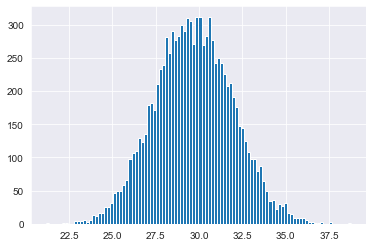

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style(style=None , rc=None) #Pretty background including grid lines for our backdrop
plt.hist(sample_means, bins=100);

+ Interesting! The first thing to note here is that the sample means form a normal distribution! What's more, let's take a look at the mean of our sample means:

In [36]:
import numpy as np
np.mean(sample_means)

29.678139189972246

+ 
Wow! Look at that! The mean of our sample means is extremely close to the actual mean of the population! The mean of means of this simulation shows an accuracy of 99.9%

In [37]:
population_mean = df.Age.mean()
mean_sample_means = np.mean(sample_means)
acc = 1 - (np.abs(mean_sample_means - population_mean) / population_mean)
print(acc)

0.9992936336582157


# Central Limit Theorem

## Introduction

In this lesson, we'll start to investigate a *central* statistical concept; the central limit theorem! (And how to write a good dry math pun.)

## Objectives
You will be able to:
* Describe how the central limit theorem is related to sampling
* Describe how the central limit theorem can be used for parameter estimation

## What does the Central Limit Theorem stand for?

The central limit theorem states that, under many conditions, independent random variables summed together will converge to a normal distribution as the number of variables increases. This becomes very useful for applying statistical logic to sample statistics in order to estimate population parameters. For example, as we saw in the previous lecture, the averages of samples will form a normal distribution. We can then use this information to put further bounds on our estimates of the population. We can also use this information to estimate the probability of samples taking on extreme values that deviate from the population mean.  

For example, let's say that we know the mean and standard deviation of asthma rates in the United States. If we then take a sample from a specific city and find that the mean of this sample is substantially lower than that of the overall population, we may be interested in questions such as "what is the probability that this was just caused by random chance in sampling?" If the probability is exceedingly low, we have further reason to believe that this city has higher rates of asthma and that its population is statistically different then that of the general population.  

The computation would be something like this: we know the mean population, and by the central limit theorem, the average of various samples takes on a normal distribution. From that normal distribution of sample means, we can then compare the mean of our actual sample and compare it to the distribution of means. It should be quite rare that our sample mean falls outside 2 or 3 standard deviations from the mean of sample means, (roughly 2.35% and .15% respectively for each tail). As such, having a sample mean that falls outside of these scopes is worthy of further investigation.

For reference, here's is a rough empirical rule for percentiles within a normal distribution. (And again, by the central limit theorem, we expect our sample means to take on a normal distribution!)

<img src="../../images/new_CentralLimitTheorem.png" width="600">

## Additional Resources

http://sphweb.bumc.bu.edu/otlt/MPH-Modules/BS/BS704_Probability/BS704_Probability13.html